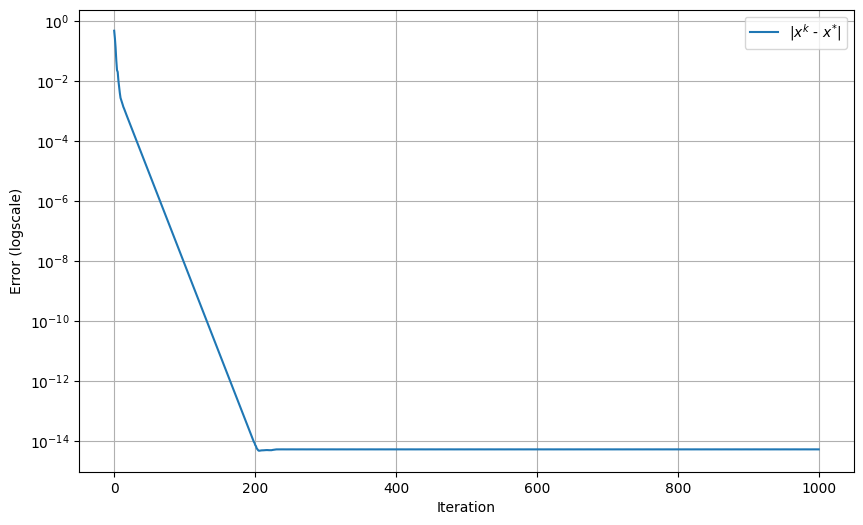

In [38]:
import numpy as np
import matplotlib.pyplot as plt

P = np.array([
    [0,   0,   0,   0,   0,  0, 1/3,  0],
    [1/2, 0, 1/2, 1/3,   0,   0,  0, 0],
    [1/2, 0,  0,   0,   0,   0,  0, 0],
    [0,   1,   0,   0,   0,   0,  0, 0],
    [0, 0, 1/2, 1/3,   0,   0, 1/3,  0],
    [0,   0, 0, 1/3, 1/3, 0,   0, 1/2],
    [0,   0, 0, 0, 1/3, 0,   0, 1/2],
    [0,   0,   0, 0, 1/3, 1, 1/3,   0]
])

n = P.shape[0]
I_k = np.ones(n) / n

eigenvalues, eigenvectors = np.linalg.eig(P)

stationary = np.real(eigenvectors[:, np.isclose(eigenvalues, 1)].flatten())
stationary = stationary / stationary.sum()


tolerance = 1e-15
max_iterations = 1000
iterations = 0

errors_real = []
for _ in range(max_iterations):
    I_next = P @ I_k
    error = np.linalg.norm(I_next - stationary, ord=1) 
    errors_real.append(error)
    if error < tolerance:
        break
    I_k = I_next


plt.figure(figsize=(10, 6))
plt.plot(errors_real, label="|$x^{k}$ - $x^{*}$|")
plt.yscale('log')
plt.xlabel("Iteration")
plt.ylabel("Error (logscale)")
plt.legend()
plt.grid()
plt.show()
